***Importing Necessary Dependencies***

In [2]:
# Import necessary packages
# type: ignore
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno

# For interactive visualizations (optional, for later visualizations)
import plotly.express as px

# Load the CSV file from Google Drive or local storage
# If using Google Colab, you can upload the file manually or mount Google Drive
from google.colab import files

# Upload file
uploaded = files.upload()

# Once uploaded, load the CSV file using pandas
import io
file_path = next(iter(uploaded))  # Get the first uploaded file
data = pd.read_csv(io.BytesIO(uploaded[file_path]))

# Display the first few rows of the dataset to check if it loaded correctly
data.head(10)


ModuleNotFoundError: No module named 'pandas'

In [ ]:
#Check for DataFrame Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 448 non-null    float64
 1   relid              448 non-null    object 
 2   year               449 non-null    object 
 3   active_year        448 non-null    float64
 4   code_status        448 non-null    object 
 5   type_of_violence   448 non-null    float64
 6   conflict_dset_id   448 non-null    float64
 7   conflict_new_id    448 non-null    float64
 8   conflict_name      448 non-null    object 
 9   dyad_dset_id       448 non-null    float64
 10  dyad_new_id        448 non-null    float64
 11  dyad_name          448 non-null    object 
 12  side_a_dset_id     448 non-null    float64
 13  side_a_new_id      448 non-null    float64
 14  side_a             449 non-null    object 
 15  side_b_dset_id     448 non-null    float64
 16  side_b_new_id      448 non

**DATA Pre-Processing**

In [ ]:
# Check for missing values in each column
missing_values = data.isnull().sum().sum()
print("#Total Missing Values in the Dataset",missing_values)

# Check for NAN Values in a Dataset
total_nan = data.isna().sum().sum()
print("#Total NaN values in the dataset:", total_nan)

#Check for missing values in each column
missing_values = data.isnull().sum()
print("#Missing Values in Each Column\n",missing_values)

#Total Missing Values in the Dataset 1323
#Total NaN values in the dataset: 1323
#Missing Values in Each Column
 id                     1
relid                  1
year                   0
active_year            1
code_status            1
type_of_violence       1
conflict_dset_id       1
conflict_new_id        1
conflict_name          1
dyad_dset_id           1
dyad_new_id            1
dyad_name              1
side_a_dset_id         1
side_a_new_id          1
side_a                 0
side_b_dset_id         1
side_b_new_id          1
side_b                 0
number_of_sources      1
source_article         0
source_office        191
source_date          191
source_headline      190
source_original       67
where_prec             1
where_coordinates      0
where_description     40
adm_1                 49
adm_2                118
latitude               0
longitude              0
geom_wkt               1
priogrid_gid           1
country                0
iso3                   0
country_id  

In [ ]:
# Convert numeric columns to proper types where applicable and handle missing data

# Replace missing numeric values with 0 (or another relevant placeholder based on the column meaning)
numeric_columns = ['deaths_a', 'deaths_b', 'deaths_civilians', 'deaths_unknown', 'best', 'high', 'low', 'latitude', 'longitude']

# Replace missing numeric values with 0
data[numeric_columns] = data[numeric_columns].fillna(0)

# Convert columns to appropriate data types
data['latitude'] = pd.to_numeric(data['latitude'], errors='coerce')
data['longitude'] = pd.to_numeric(data['longitude'], errors='coerce')

# Convert date columns to datetime format
date_columns = ['date_start', 'date_end']
for col in date_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')

# Drop rows where critical data is missing (e.g., conflict name, year)
#Rows with missing critical data (e.g., conflict name, year) were dropped.
cleaned_data = data.dropna(subset=['conflict_name', 'year'])

# Preview cleaned data
cleaned_data_info = cleaned_data.info()
cleaned_data_preview = cleaned_data.head()

cleaned_data_info, cleaned_data_preview


<class 'pandas.core.frame.DataFrame'>
Index: 448 entries, 1 to 448
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 448 non-null    float64       
 1   relid              448 non-null    object        
 2   year               448 non-null    object        
 3   active_year        448 non-null    float64       
 4   code_status        448 non-null    object        
 5   type_of_violence   448 non-null    float64       
 6   conflict_dset_id   448 non-null    float64       
 7   conflict_new_id    448 non-null    float64       
 8   conflict_name      448 non-null    object        
 9   dyad_dset_id       448 non-null    float64       
 10  dyad_new_id        448 non-null    float64       
 11  dyad_name          448 non-null    object        
 12  side_a_dset_id     448 non-null    float64       
 13  side_a_new_id      448 non-null    float64       
 14  side_a         

(None,
          id                 relid  year  active_year code_status  \
 1  120816.0  IRN-1990-1-260-10000  1990          1.0       Clear   
 2  115843.0      IRN-1990-1-260-2  1990          1.0       Clear   
 3  115822.0      IRN-1990-1-260-4  1990          1.0       Clear   
 4  115821.0      IRN-1990-1-260-3  1990          1.0       Clear   
 5  115844.0      IRN-1990-1-260-5  1990          1.0       Clear   
 
    type_of_violence  conflict_dset_id  conflict_new_id    conflict_name  \
 1               1.0             205.0            205.0  Iran: Kurdistan   
 2               1.0             205.0            205.0  Iran: Kurdistan   
 3               1.0             205.0            205.0  Iran: Kurdistan   
 4               1.0             205.0            205.0  Iran: Kurdistan   
 5               1.0             205.0            205.0  Iran: Kurdistan   
 
    dyad_dset_id  ...   date_end deaths_a  deaths_b  deaths_civilians  \
 1         406.0  ... 1990-04-17      0.0     

In [ ]:
# # Check for missing values(null,Nan) in each column
missing_values = cleaned_data.isnull().sum().sum()
total_nan_after = cleaned_data.isna().sum().sum()

# Verify changes
print("Total Missing Values",missing_values)
print("Total NaN values after filling:", total_nan_after)

Total Missing Values 1289
Total NaN values after filling: 1289


***Visualization of the Dataset***

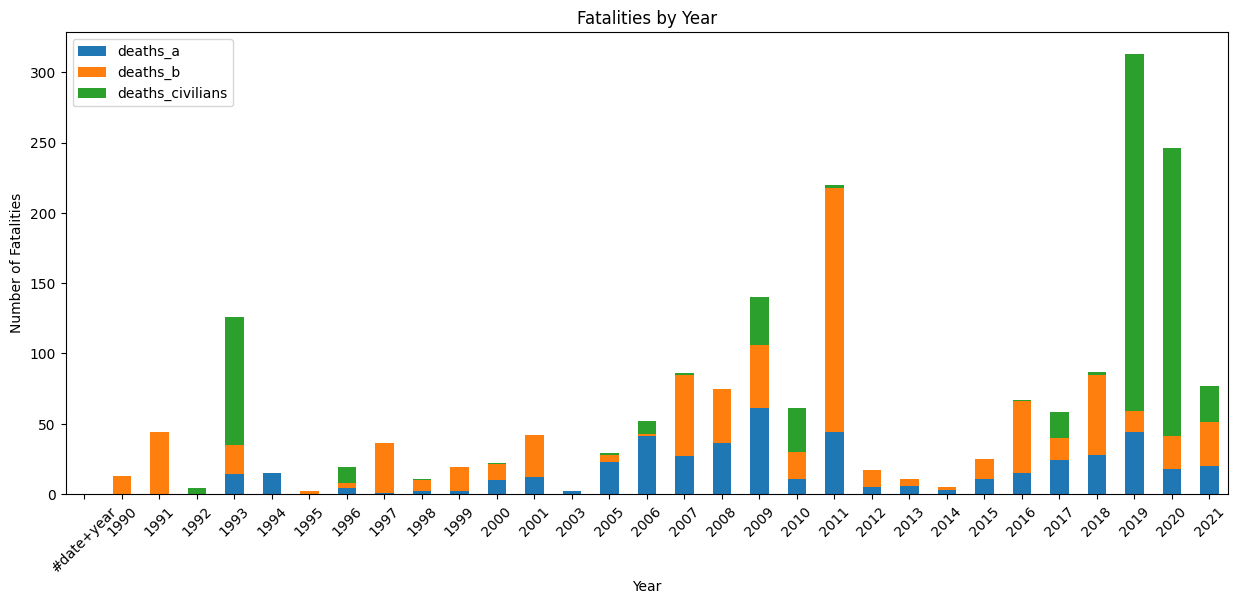

In [ ]:
# Aggregate fatalities by year
fatalities_per_year = data.groupby('year')[['deaths_a', 'deaths_b', 'deaths_civilians']].sum()

# Plot Stacked Bar Chart
fatalities_per_year.plot(kind='bar', stacked=True, figsize=(15,6))
plt.title('Fatalities by Year')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.xticks(rotation=45)
plt.show()

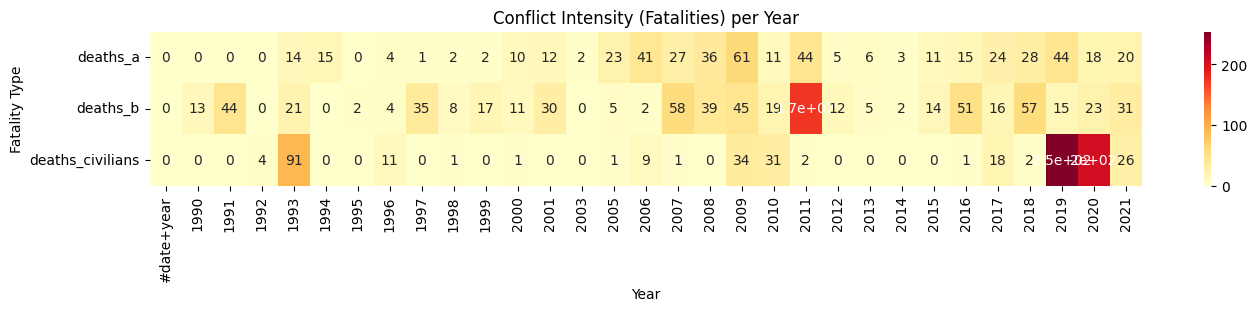

In [ ]:
# Plot heatmap using Seaborn for fatalities per year
plt.figure(figsize=(16,2))
sns.heatmap(fatalities_per_year.T, cmap='YlOrRd', annot=True)
plt.title('Conflict Intensity (Fatalities) per Year')
plt.xlabel('Year')
plt.ylabel('Fatality Type')
plt.show()


In [ ]:
import plotly.express as px

# Add a new column for total fatalities, replacing NaN with 0
geo_data['total_fatalities'] = geo_data['deaths_a'].fillna(0) + geo_data['deaths_b'].fillna(0) + geo_data['deaths_civilians'].fillna(0)

# Create the interactive scatter map
fig = px.scatter_geo(
    geo_data,
    lat='latitude',
    lon='longitude',
    hover_name='conflict_name',
    hover_data={
        'year': True,
        'deaths_a': True,
        'deaths_b': True,
        'deaths_civilians': True,
        'total_fatalities': True,
        'date_start': True,
        'date_end': True
    },
    color='total_fatalities',  # Color markers based on total fatalities
    size='total_fatalities',  # Adjust marker size based on total fatalities
    size_max=30,  # Increased maximum marker size for better visibility
    color_continuous_scale='Viridis',  # Use a different color scale
    title='Conflict Distribution by Location (Size & Color by Fatalities)',
    template='plotly_dark',
    projection='natural earth'  # Use a natural earth projection
)

# Improve layout: Set zoom, add geographic borders, and customize appearance
fig.update_layout(
    geo=dict(
        showland=True,
        landcolor='rgb(243, 243, 243)',
        showcountries=True,
        countrycolor='rgb(204, 204, 204)',
        coastlinecolor='rgb(204, 204, 204)',
        projection_scale=3  # Adjust zoom level (higher is more zoomed in)
    ),
    margin={"r":0,"t":50,"l":0,"b":0},  # Reduce margins for better view
    coloraxis_colorbar=dict(
        title="Total Fatalities",  # Add a color bar title
        ticks="outside"
    ),
    legend_title=dict(text="Total Fatalities")
)

# Optional: Customize marker appearance
fig.update_traces(marker=dict(opacity=0.7, line=dict(width=0.5, color='DarkSlateGrey')))  # Set opacity and border

fig.show()


ModuleNotFoundError: No module named 'plotly'

In [ ]:
# Convert 'best', 'high', 'low' to numeric for proper plotting
data['best'] = pd.to_numeric(data['best'], errors='coerce')
data['high'] = pd.to_numeric(data['high'], errors='coerce')
data['low'] = pd.to_numeric(data['low'], errors='coerce')

# Plot box plot for fatalities
plt.figure(figsize=(10,6))
sns.boxplot(data=data[['best', 'high', 'low']])
plt.title('Distribution of Fatalities (Best, High, Low)')
plt.ylabel('Number of Fatalities')
plt.show()


NameError: name 'pd' is not defined